In [17]:
import sys, os
sys.path.append("../..")
sys.path.append("..")
sys.path.append(os.getcwd())

from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates



import numpy as np
import pandas as pd
import copy

from tslib.src import tsUtils
from tslib.src.synthcontrol.syntheticControl import RobustSyntheticControl
from tslib.tests import testdata

In [303]:
filename = r'C:\projects\RSC\tslib\tests\testdata\US_Accidents_May19.csv'

df = pd.read_csv(filename, usecols=['Start_Time', 'State'], parse_dates=['Start_Time'])

df['Start_Time']=df['Start_Time'].apply(lambda x: x.date())
df=df.groupby(['State', 'Start_Time']).size().reset_index(name ='count')   

df.Start_Time=pd.to_datetime(df.Start_Time)
df=df.set_index(['Start_Time'])
df=df.sort_index()


StartDate = pd.to_datetime('2016-09-30')
InterventionDate = pd.to_datetime('2018-07-01')
EndDate = pd.to_datetime('2019-02-28')

df=df.truncate(before=pd.Timestamp(StartDate))
df=df.truncate(after=pd.Timestamp(EndDate))



In [304]:
df=df.groupby('State').resample('m').agg({"count" : 'sum'}).reset_index()
df = df[['Start_Time', 'State', 'count']]
df=df.pivot(index='Start_Time', columns='State', values='count'  ).fillna(0)


In [305]:
states = df.columns.values.tolist()
StateKey = 'VT'
states.remove(StateKey)
otherStates = states




In [306]:
df.reset_index(inplace=True)
trainDF=df[df['Start_Time']<InterventionDate]
testDF=df[df['Start_Time']>InterventionDate]
testDF.reset_index(drop=True, inplace=True)
trainDF=trainDF.set_index(['Start_Time'])
testDF=testDF.set_index(['Start_Time'])

Text(0.5,1,'Singular Value Spectrum')

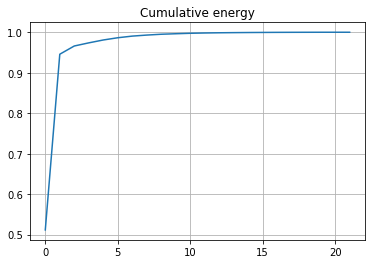

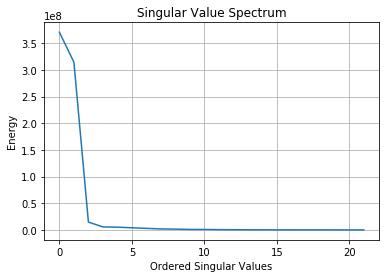

In [307]:
p = 1.0
(U, s, Vh) = np.linalg.svd((trainDF) - np.mean(trainDF))
s2 = np.power(s, 2)
spectrum = np.cumsum(s2)/np.sum(s2)

plt.plot(spectrum)
plt.grid()
plt.title("Cumulative energy")
plt.figure()
plt.plot(s2)
plt.grid()


plt.xlabel("Ordered Singular Values") 
plt.ylabel("Energy")


plt.title("Singular Value Spectrum")


In [308]:
singvals = 8
rscModel = RobustSyntheticControl(StateKey, singvals, len(trainDF), probObservation=1.0, modelType='svd', svdMethod='numpy', otherSeriesKeysArray=otherStates)
rscModel.fit(trainDF)
denoisedDF = rscModel.model.denoisedDF()
predictions = []
predictions = np.dot(testDF[otherStates], rscModel.model.weights)

df=df.reset_index()
actual = df.loc[:, ['Start_Time', StateKey]]
df.set_index('Start_Time')
actual.reset_index(inplace=True)
years=actual['Start_Time'].astype(str).tolist()

model_fit = np.dot(trainDF[otherStates][:], rscModel.model.weights)

actual=actual.reset_index(drop=True)

df.set_index('Start_Time')

State,index,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Start_Time,,,,,,,,,,,,,,,,,,,,,
2016-09-30,0,0.0,0.0,36.0,540.0,14.0,17.0,0.0,2.0,274.0,...,0.0,9.0,397.0,5.0,27.0,1.0,64.0,11.0,2.0,0.0
2016-10-31,1,23.0,6.0,491.0,15877.0,217.0,534.0,50.0,32.0,5324.0,...,0.0,188.0,7769.0,148.0,1058.0,1.0,1459.0,231.0,32.0,10.0
2016-11-30,2,13.0,3.0,483.0,17671.0,201.0,714.0,98.0,45.0,6620.0,...,1.0,267.0,9850.0,158.0,1455.0,5.0,1606.0,280.0,61.0,16.0
2016-12-31,3,24.0,3.0,429.0,14925.0,199.0,591.0,81.0,26.0,6318.0,...,2.0,315.0,8122.0,132.0,1371.0,5.0,1630.0,256.0,39.0,14.0
2017-01-31,4,31.0,9.0,305.0,14568.0,178.0,539.0,79.0,26.0,5523.0,...,2.0,221.0,8699.0,159.0,1122.0,3.0,1240.0,255.0,53.0,13.0
2017-02-28,5,13.0,17.0,294.0,14406.0,133.0,533.0,78.0,29.0,4937.0,...,2.0,199.0,7188.0,94.0,932.0,13.0,1429.0,227.0,62.0,22.0
2017-03-31,6,25.0,15.0,399.0,14680.0,138.0,596.0,62.0,20.0,6616.0,...,0.0,275.0,8610.0,100.0,1180.0,15.0,1352.0,242.0,72.0,10.0
2017-04-30,7,26.0,16.0,266.0,14573.0,170.0,436.0,53.0,25.0,4359.0,...,0.0,266.0,7483.0,65.0,928.0,3.0,1095.0,191.0,51.0,4.0
2017-05-31,8,72.0,4.0,438.0,11398.0,218.0,426.0,45.0,50.0,3902.0,...,0.0,230.0,5678.0,138.0,930.0,5.0,1098.0,244.0,38.0,2.0


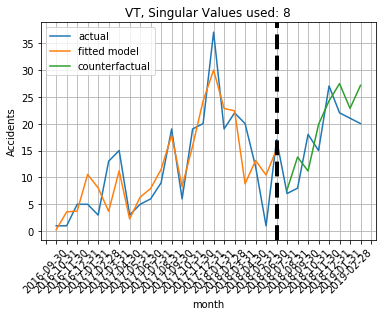

In [309]:
fig, ax = plt.subplots(1,1)
tick_spacing = 1
# this is a bug in matplotlib
label_markings = np.insert(years[::tick_spacing], 0, 'dummy')
#print (label_markings)
ax.set_xticks(np.arange(len(years)))
ax.set_xticklabels(label_markings, rotation=45)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.plot(years, actual[StateKey] ,label='actual')
plt.xlabel('month')
plt.ylabel('Accidents')

plt.plot(  [d.strftime('%Y-%m-%d') for d in pd.date_range(start=StartDate, end=InterventionDate, freq='m')], model_fit, label='fitted model')
plt.plot([d.strftime('%Y-%m-%d') for d in pd.date_range(start=InterventionDate, end=EndDate, freq='m')], predictions, label='counterfactual')
plt.title(StateKey+', Singular Values used: '+str(singvals))

xposition = pd.to_datetime('2018-06-30',  errors='coerce')
plt.axvline(x=str(xposition.strftime('%Y-%m-%d')), color='k', linestyle='--', linewidth=4)
plt.grid()
plt.legend()